# A Quick Hands-On Tutorial on LSTM for Multi-Input Time-Series Regression

In this notebook, you can find a brief tutorial on how to use LSTM for a simple regression problem. The following topics will be covered and hopefully at the end you will be able to use it for your own applications:
* Understanding the time-series models with multiple input features
* Very brief overview of LSTM units
* Creating a neural network model based on LSTMs
* Training an LSTM based neural network
* using the model to predict the output using the time-series inputs


The tutorial will cover the implementation using Keras (and TensorFlow as the backend).
You will be walked through all of the above via a simple regression example.

## Understanding a time-series model

In a usual regression problem, the real-valued output is a function of a number of input feature values. in a time-series, the output value depends on both the input feature values and the state at the previous time step.

In below, we randomly generate a time-series with two input values.
As you can see, the output value at time `t`, `Y[t]` is a function of the input value at time `t` and `t-1` i.e. `X1[t]` and `X1[t-1]`.

Although this is a very simple case and you can predict the value of `Y[t]` from `X1[t]`, in some cases the time dependency should also be used. 
For the purpose of this tutorial, we focus on predicting the `Y[t]` from `X[t],...,X[t-T]` where `T` is the size of time window used for the prediction.

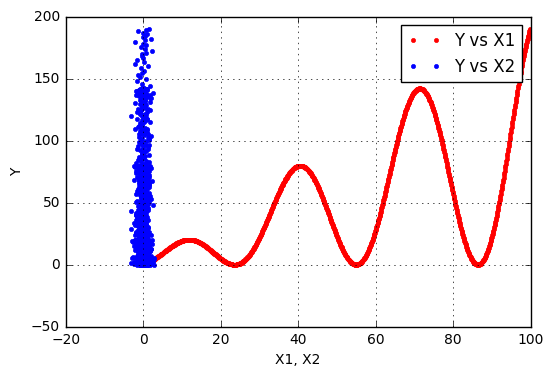

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Y = np.zeros(1000)
X1 = np.zeros(1000)
X2 = np.random.randn(1000)
for t in range(1000):
    X1[t] = t / 10
    Y[t] =  np.sin(X1[t]/5) * X1[t]
    if t > 0:
        Y[t] += X1[t-1]

X = np.stack((X1, X2), axis = 1)
        
plt.plot(X1, Y, 'r.')
plt.plot(X2, Y, 'b.')
plt.xlabel('X1, X2')
plt.ylabel('Y')
plt.legend(['Y vs X1', 'Y vs X2'])
plt.grid(True)

## Overview of LSTM

The Long-Short Term Memory (LSTM) is a special structure (shown in figure below) of the recurrent networks where the long term memory problem (caused as a result of fading gradients) is addressed by gating the feedback path.
The LSTM is now widely used in natural language processing applications where a sequence of input features is available. 

Taken from [this complete introduction to LSTM](http://colah.github.io/posts/2015-08-Understanding-LSTMs/),
an unrolled version of an LSTM unit is shown below.

[<img src="LSTM3-chain.png" width="550"/>](http://colah.github.io/posts/2015-08-Understanding-LSTMs/)




## Creating a neural network model based on LSTMs using Keras

Keras is a wrapper package for Theano and TensorFlow which makes it easier to implement complicated network structures by providing a very abstract API. 
Using the `Sequential` API in Keras, we can make a neural network by adding different layers together:
```
model = Sequential([
    LSTM(100, return_sequences=True, input_shape=(timesteps, 2)),
    LSTM(60),
    Dense(1),
])

```
In the above example, a sequential model is built by adding two LSTM layers and a dense layer together.
Keras has a rich list of layers including [Densely connected](https://keras.io/layers/core/), [Convolutional](https://keras.io/layers/convolutional/), [Recurrent](https://keras.io/layers/recurrent/), [Embedding](https://keras.io/layers/embeddings/) and etc.

### LSTM Layer
The implementation of LSTM in Keras includes the following arguments:
* `return_sequences`: This specifies if the layer should return a sequence of output values or only the values for the last time step. In case there is another recurrent layer after this layer, you need to set this option True so that the next recurrent layer receives a sequence as its input (see the example above)
* `stateful`: This option will determine if the inner state of LSTM for the previous batch is used as initial value for the state of LSTM in the current batch of sample. This will be discussed in the following section.
* `input_shape`: This is the dimension of the input to the layer and has to be set if this is the very first layer of the network. If your problem is such that you have `num_features` input values for each time step and you have `time_steps` previous time steps for prediction of the current output, your input shape should be `[time_steps, num_features]`.
* `input_length1`/`input_dim`: This is an alternative way to represent the input shape of the layer. The length will determine the length of the time-sequence and the dimension will specify the number of input features.
* `output_dim`: This determines the number of output values from this layer. Essentially, this is exactly the number of units in the LSTM layer. 
* `init`/`inner_init`: This is the function which initializes the weights and inner cells (states), respectively. The default valut is `glorot_uniform` for weights and you can pick one from [this list](https://keras.io/initializations/).
* `activation`: ?
* `inner_activation`: ?

The `compile` method will finally create the necessary tensors for the calculations of the model.
You can specify your own loss and optimization algorithm for the training stage when calling the `compile` method. 
In our case of regression, the mean squared error is an appropriate loss function and we plan to use the ADAM algorithm for training of our model.
To get familir with different optimization algorithms for training, you can read [this article](http://sebastianruder.com/optimizing-gradient-descent/index.html).

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Activation, LSTM

timesteps = 5

model = Sequential([
    LSTM(100, return_sequences=True, input_shape=(timesteps, 2)),
    LSTM(60),
    #LSTM(100),
    Dense(1),
])

model.compile(loss='mean_squared_error', optimizer='adam')

Using TensorFlow backend.


## Training the LSTM based networks


### Feature Scaling

### Building the training matrices for fitting

### Stateful LSTM

In [ ]:


from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit( trainX )
trainXscaled = scaler.transform(trainX)

batch_size_ = 4



lstmTrainX = np.zeros([trainXscaled.shape[0], timesteps, 2])
lstmTrainY = np.zeros(trainXscaled.shape[0])

for i in range(timesteps, trainXscaled.shape[0]):
    lstmTrainX[i, :, :] = trainX[i-timesteps:i,:]
    lstmTrainY[i] = trainY[i]

from sklearn.utils import shuffle
lstmTrainX, lstmTrainY = shuffle(lstmTrainX, lstmTrainY)

hist = model.fit(lstmTrainX, lstmTrainY, nb_epoch=100, batch_size=batch_size_, verbose = 1, validation_split=0.2, shuffle=True)

plt.plot(np.log(hist.history['loss']), 'b.')
plt.plot(np.log(hist.history['val_loss']), 'r.')
plt.show()

##  Prediction of time-series samples


In [ ]:
predY = model.predict(lstmTrainX, batch_size = 2)
plt.plot(x1, y, 'r.')
plt.plot(lstmTrainX[0:,0], predY[0:], 'b.')